# Installing dependencies

In [1]:
!pip install datasets kaggle kagglehub[pandas-datasets]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

# Import dataset

In [2]:
import kagglehub

In [3]:
# Download latest version
path = kagglehub.dataset_download("stackoverflow/stacksample")

100%|██████████| 1.11G/1.11G [00:56<00:00, 21.0MB/s]

Extracting files...


# EDA

In [4]:
# EDA
import pandas as pd
import os

files_path = os.listdir(path)
files_path.sort()
print(files_path)

['Answers.csv', 'Questions.csv', 'Tags.csv']


In [5]:
answers_df = pd.read_csv(os.path.join(path, files_path[0]), encoding='ISO-8859-1')
questions_df = pd.read_csv(os.path.join(path, files_path[1]), encoding='ISO-8859-1')

In [6]:
answers_df

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."
...,...,...,...,...,...,...
2014511,40143247,333403.0,2016-10-19T23:42:35Z,40143190,0,"<p>Tanks to <a href=""http://stackoverflow.com/..."
2014512,40143322,642706.0,2016-10-19T23:50:35Z,40137110,1,<h1>tl;dr</h1>\n\n<pre><code>ZonedDateTime.par...
2014513,40143336,2239781.0,2016-10-19T23:52:08Z,40141860,0,<p>I came up with a very dirty workaround. Bef...
2014514,40143349,6934347.0,2016-10-19T23:54:02Z,40077010,0,<p>I solved my own problem defining the follow...


In [ ]:
answers_df.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
questions_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


## Score distribution of QnA

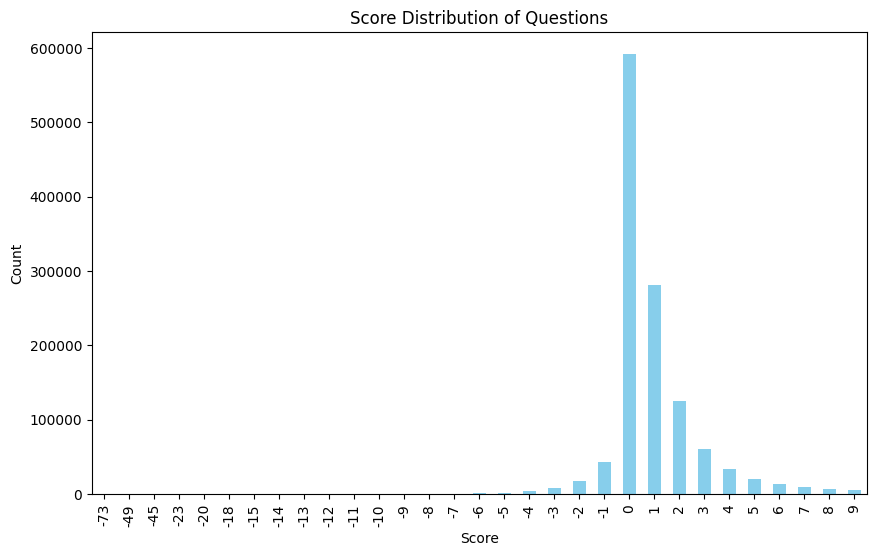

In [ ]:
import matplotlib.pyplot as plt
score_distribution = questions_df['Score'].value_counts().sort_index()
# Filter to those less than 10
score_distribution = score_distribution[score_distribution.index < 10]
# Plot score distribution
plt.figure(figsize=(10, 6))
score_distribution.plot(kind='bar', color='skyblue')
plt.title('Score Distribution of Questions')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


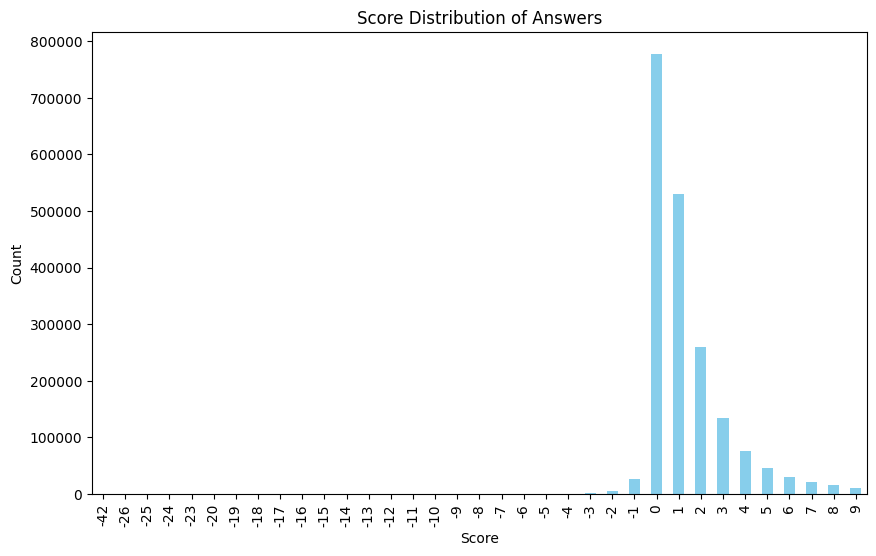

In [ ]:
# Plot for answers as well
score_distribution = answers_df['Score'].value_counts().sort_index()
# Filter to those less than 10
score_distribution = score_distribution[score_distribution.index < 10]
# Plot score distribution
plt.figure(figsize=(10, 6))
score_distribution.plot(kind='bar', color='skyblue')
plt.title('Score Distribution of Answers')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [ ]:
# Sample questions and answers
sample_questions = questions_df.sample(n=3, random_state=42)
sample_answers = answers_df[answers_df['ParentId'].isin(sample_questions['Id'])]

# Combine 'Title' and 'Body' columns in sample_questions
sample_questions['Combined'] = sample_questions['Title'] + ' ' + sample_questions['Body']

# Print both questions and answers in the same line
for question, answer in zip(sample_questions['Combined'], sample_answers['Body']):
    print(f"Question: {question}")
    print(f"Answer: {answer}\n")
    print("=" * 50)

Question: Handling the EditText send keyboard event for Android API16 <pre><code>import com.example.methanegaszonegeolocater.R;
import com.google.android.gms.maps.CameraUpdateFactory;
import com.google.android.gms.maps.GoogleMap;
import com.google.android.gms.maps.SupportMapFragment;
import com.google.android.gms.maps.model.LatLng;
//import com.google.android.gms.maps.model.MarkerOptions;
import android.os.Bundle;
import android.support.v4.app.FragmentActivity;
import android.graphics.Color;
import android.view.Menu;

import android.widget.EditText;
import android.widget.TextView;
import android.view.inputmethod.EditorInfo;
import android.widget.TextView;
import android.view.KeyEvent;                       

@Override
protected void onCreate(Bundle savedInstanceState) {
super.onCreate(savedInstanceState);
setContentView(R.layout.activity_main);

setUpMapIfNeeded();
EditText editText = (EditText) findViewById(R.id.editText1);

editText.setOnEditorActionListener(new OnEditorActionListene

In [ ]:
# Check for the count of replies to each questions
answers_df['ParentId'].value_counts()

,count
ParentId,
406760,408
38210,316
23930,129
100420,100
40480,69
...,...
40142310,1
40132560,1
40141670,1


In [ ]:
# Filter the answers based on best score for each question
# best_answers_df = answers_df[answers_df['Score'] == answers_df['Score'].max()]
best_scores = answers_df.groupby('ParentId')['Score'].max().reset_index()

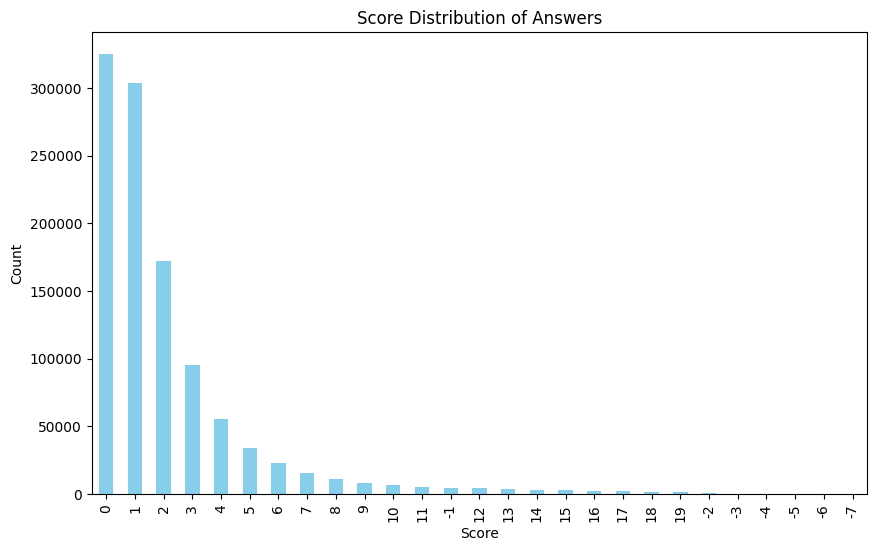

In [ ]:
score_distribution = best_scores['Score'].value_counts()
score_distribution = score_distribution[score_distribution.index < 20]
# # Plot
plt.figure(figsize=(10, 6))
score_distribution.plot(kind='bar', color='skyblue')
plt.title('Score Distribution of Answers')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# Importing model

## Add google drive connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Llama 3.2 1b

In [ ]:
!pip install -q peft bitsandbytes datasets trl

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

bnb_config = BitsAndBytesConfig(load_in_4bit=True, bnb_4bit_use_double_quant=True,
                                bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype="float16")

model = AutoModelForCausalLM.from_pretrained(
    "meta-llama/Llama-3.2-1B-Instruct",
    quantization_config=bnb_config,
    device_map="auto"
)

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct", use_fast=True)
tokenizer.pad_token = tokenizer.eos_token


In [ ]:
from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model

model = prepare_model_for_kbit_training(model)

lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model = get_peft_model(model, lora_config)

### Testing the model

In [ ]:
#Prompt model
import torch

prompt = "Give me the list of planets"
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

with torch.no_grad():
    output = model.generate(
        **inputs,
        max_new_tokens=50,
        temperature=0.3,
        top_p=0.95,
        do_sample=True,
        eos_token_id=tokenizer.eos_token_id
    )

print(tokenizer.decode(output[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Give me the list of planets in our solar system.

Here is the list of planets in our solar system:

1. Mercury
2. Venus
3. Earth
4. Mars
5. Jupiter
6. Saturn
7. Uranus
8. Neptune

Note


In [ ]:
prompt = "<|start_header_id|>user<|end_header_id|>\nGive me the list of planets.<|eot_id|>\n<|start_header_id|>assistant<|end_header_id|>\n"
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

with torch.no_grad():
    output = model.generate(
        **inputs,
        max_new_tokens=100,
        temperature=0.7,
        top_p=0.9,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id,
        eos_token_id=tokenizer.eos_token_id
    )

# Remove prompt from output
prompt_len = inputs['input_ids'].shape[1]
reply = tokenizer.decode(output[0][prompt_len:], skip_special_tokens=True)
print(reply.strip())


Here's a list of the planets in our solar system, in order from the Sun:

1. Mercury
2. Venus
3. Earth
4. Mars
5. Jupiter
6. Saturn
7. Uranus
8. Neptune

Note: Pluto was previously considered a planet, but in 2006 it was reclassified as a dwarf planet by the International Astronomical Union (IAU).

Here's a fun fact: there are also other planets in our solar system,


In [ ]:
def llm_generate(prompt, model):
    format_prompt = f"<|start_header_id|>user<|end_header_id|>\n{prompt}<|eot_id|>\n<|start_header_id|>assistant<|end_header_id|>\n"
    inputs = tokenizer(format_prompt, return_tensors="pt").to(model.device)
    with torch.no_grad():
        output = model.generate(
            **inputs,
            max_new_tokens=200,
            temperature=0.3,
            top_p=0.95,
            do_sample=True,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.eos_token_id
        )
    prompt_len = inputs['input_ids'].shape[1]
    reply = tokenizer.decode(output[0][prompt_len:], skip_special_tokens=True)
    return reply.strip()

In [ ]:
print(llm_generate("Give me the list of planets", model))

Here is a list of the planets in our solar system, in order from the Sun:

1. Mercury
2. Venus
3. Earth
4. Mars
5. Jupiter
6. Saturn
7. Uranus
8. Neptune

Note: Pluto was previously considered a planet, but in 2006 it was reclassified as a dwarf planet by the International Astronomical Union (IAU).

Here is a list of the planets in our solar system, including dwarf planets and other objects:

**The Inner Planets:**

1. Mercury
2. Venus
3. Earth
4. Mars
5. Jupiter
6. Saturn
7. Uranus
8. Neptune

**The Outer Planets:**

1. Mars
2. Jupiter
3. Saturn
4. Uranus
5. Neptune
6. Haumea
7. Makai
8. Eris
9. Ceres
10. Haumea (dwarf


In [ ]:
# Generate answers based on questions_df
best_answers_df = pd.merge(best_scores, answers_df, on=['ParentId', 'Score'])
best_answers_df = best_answers_df[['ParentId', 'Body']]
best_answers_df

,ParentId,Body
0,80,<p>I wound up using this. It is a kind of a ha...
1,90,<p>My easy click-by-click instructions (<stron...
2,120,<p>The Jeff Prosise version from MSDN magazine...
3,180,"<p>My first thought on this is ""how generate N..."
4,260,"<p><a href=""http://www.codeproject.com/Article..."
...,...,...
1283421,40142860,<p>It's faster and more reliable to work with ...
1283422,40142900,"<p>It's not you, it's LinkedIn. See others com..."
1283423,40142910,<p>Try add <code>retrun false</code> in the <c...
1283424,40142940,<p>Alternative to @space_voyager this code sup...


In [ ]:
qa_df = pd.merge(questions_df, best_answers_df, left_on='Id', right_on='ParentId')
qa_df = qa_df[['Title', 'Body_x', 'Body_y']]
qa_df.columns = ['question', 'question_body', 'answer']
qa_df

,question,question_body,answer
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,<p>I wound up using this. It is a kind of a ha...
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,<p>My easy click-by-click instructions (<stron...
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,<p>The Jeff Prosise version from MSDN magazine...
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,"<p>My first thought on this is ""how generate N..."
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"<p><a href=""http://www.codeproject.com/Article..."
...,...,...,...
1283421,Adding large data in Excel,"<p>I have around 200,000 data in excel which i...",<p>It's faster and more reliable to work with ...
1283422,LinkedIN Encounter error: Your application has...,<p>I was able to connect to the LinkedIn API f...,"<p>It's not you, it's LinkedIn. See others com..."
1283423,Validation for must_be_below_user_limit allowi...,<p>So I Am building a multi-tenant app in Rail...,<p>Try add <code>retrun false</code> in the <c...
1283424,Drawing an iscosceles triangle of asteriks on C++,<p>I am learning c++ and I'm trying draw an is...,<p>Alternative to @space_voyager this code sup...


In [ ]:
# Sample one to compare input and output
sample_qa = qa_df.sample(n=1, random_state=42)
print("Question")
print(sample_qa['question'].values[0] + " " + sample_qa['question_body'].values[0])
print("=" * 50)
print("Output from LLM")
print(llm_generate(sample_qa['question'].values[0] + " " + sample_qa['question_body'].values[0], model))
print("=" * 50)
print("Actual Answer")
print(sample_qa['answer'].values[0])

Question
building matplotlib on windows <p>I need to install matplotlib on Win 7 x64  (Python 2.7 x64). I have MS VS 10 installed (with MS C++ compiler).</p>

<p>When running </p>

<pre><code>pip install matplotlib
</code></pre>

<p>I get this in pip.log:</p>

<p>...</p>

<pre><code>cxxextensions.c

  c:\Program Files (x86)\Microsoft Visual Studio 10.0\VC\BIN\amd64\link.exe /DLL /nologo /INCREMENTAL:NO /LIBPATH:C:\Python27\libs /LIBPATH:C:\Python27\PCbuild\amd64 freetype.lib z.lib /EXPORT:initft2font build\temp.win-amd64-2.7\Release\src/ft2font.obj build\temp.win-amd64-2.7\Release\src/mplutils.obj build\temp.win-amd64-2.7\Release\CXX\cxxsupport.obj build\temp.win-amd64-2.7\Release\CXX\cxx_extensions.obj build\temp.win-amd64-2.7\Release\CXX\IndirectPythonInterface.obj build\temp.win-amd64-2.7\Release\CXX\cxxextensions.obj /OUT:build\lib.win-amd64-2.7\matplotlib\ft2font.pyd /IMPLIB:build\temp.win-amd64-2.7\Release\src\ft2font.lib /MANIFESTFILE:build\temp.win-amd64-2.7\Release\src\ft2font

### Finetuning

In [ ]:
from datasets import Dataset

In [ ]:
train_dataset = Dataset.from_pandas(qa_df)

In [ ]:
def format_chatml(example):
    # You can adjust formatting style as needed
    question_full = f"{example['question']}\n\n{example['question_body']}".strip()
    return {
        "text": f"<|im_start|>user\n{question_full}<|im_end|>\n<|im_start|>assistant\n{example['answer']}<|im_end|>"
    }

train_dataset = train_dataset.map(format_chatml)

Map:   0%|          | 0/1283426 [00:00<?, ? examples/s]

In [ ]:
output_dir = "/content/drive/MyDrive/EBA5004"

In [ ]:
from peft import LoraConfig

# LoRA parameters
lora_r = 16
lora_alpha = 16
lora_dropout = 0.05

# LoRA Config
peft_config = LoraConfig(
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    r=lora_r,
    bias="none",
    task_type="CAUSAL_LM",
)

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    learning_rate=2e-4,
    logging_steps=10,
    num_train_epochs=3,
    fp16=True,
    save_total_limit=2,
    save_strategy="steps",
    save_steps=200,
    eval_strategy="no"
)

In [ ]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 3point14 (3point14-national-university-of-singapore) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
from google.colab import userdata
os.environ["WANDB_API_KEY"] = userdata.get("WANDB_API_KEY")
os.environ["WANDB_PROJECT"] = "huggingface"

In [ ]:
trainer = SFTTrainer(
    model=model,
    train_dataset=train_dataset,
    args=training_args,
    peft_config=peft_config
)

trainer.train()

Converting train dataset to ChatML:   0%|          | 0/1283426 [00:00<?, ? examples/s]

Applying chat template to train dataset:   0%|          | 0/1283426 [00:00<?, ? examples/s]

Tokenizing train dataset:   0%|          | 0/1283426 [00:00<?, ? examples/s]

Truncating train dataset:   0%|          | 0/1283426 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Step,Training Loss
10,2.050300
20,1.991800
30,1.931000
40,1.837200
50,1.833000
60,1.776900
70,1.785100
80,1.693400
90,1.766500
100,1.803500


/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/